importing libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

reading data sets

In [2]:
initial_df = pd.read_excel("Data.xlsx")
xls = pd.ExcelFile('Data.xlsx')
plants_df = pd.read_excel(xls, 'plants')
flight_df = pd.read_excel(xls, 'flight dates')
planting_df = pd.read_excel(xls, 'planting')
weather_df = pd.read_excel(xls, 'weather')

plotting each data set for further processing

In [3]:
# plants data that contains information about plants' size, etc
plants_df

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN


In [4]:
# flight data
flight_df

,Batch Number,Flight Date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01
5,468,2020-07-01
6,469,2020-07-06
7,471,2020-07-02
8,472,2020-07-02
9,473,2020-07-02


In [5]:
# planting data
planting_df

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0
...,...,...,...,...,...,...,...,...,...,...
2368,Ice 309,NaN,NaN,"2,1",NaN,387.0,NaN,NaN,NaN,80.0
2369,Ice 309,NaN,NaN,"2,2",NaN,400.0,NaN,NaN,NaN,274.0
2370,Ice 309,NaN,NaN,"2,3",NaN,319.0,NaN,NaN,NaN,224.0
2371,Ice 309,NaN,NaN,"2,4",NaN,155.0,NaN,NaN,NaN,249.0


In [6]:
# weather data
weather_df

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


Cleaning Plants data for:
- Filling missing values in Leaves column with mean values
- Droping the rows that are not blank inside 'remove' column

In [7]:
plants_df['Leaves'].fillna(value=plants_df['Leaves'].mean(),inplace=True)

In [8]:
plants_df1 = plants_df.loc[plants_df['Remove'] != 'r']

In [9]:
plants_df1

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.00,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.00,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.00,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,17.07,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,17.07,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,17.07,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,17.07,NaN,413.0,1172,2020-10-20,NaT,NaN


There are some empty rows inside fresh weight, head weight, radial, etc that we need to drop. Before that, we need to drop 'Flight Date' column as it has many empty rows which can reduce our dataset significantly. We will add it back later. 

In [10]:
flight_date = plants_df1['Flight Date']
plants_df1['Flight Date']

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4854   NaT
4855   NaT
4856   NaT
4857   NaT
4858   NaT
Name: Flight Date, Length: 4789, dtype: datetime64[ns]

In [11]:
# dropping flight column from plants data
plants_df1_new = plants_df1.drop(columns='Flight Date')

In [12]:
plants_df1_new

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,185.0,208,2020-04-30,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.00,NaN,156.0,208,2020-04-30,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.00,NaN,137.0,208,2020-04-30,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.00,NaN,225.0,208,2020-04-30,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.00,NaN,157.0,208,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,17.07,NaN,430.0,1172,2020-10-20,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,17.07,NaN,358.0,1172,2020-10-20,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,17.07,NaN,417.0,1172,2020-10-20,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,17.07,NaN,413.0,1172,2020-10-20,NaN


In [13]:
plants_df1_new.dropna(subset=[n for n in plants_df1_new if n != 'Remove'],inplace= True)

In [14]:
plants_df1_new['Flight_date'] = flight_date

In [15]:
plants_df1_new.reset_index(drop=True)

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Flight_date
0,402,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,NaT
1,402,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,NaT
2,402,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,NaT
3,402,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,NaT
4,402,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,735,2020-08-26,4,438.0,87.0,110.0,130.0,0.846154,17.07,0.105631,573.0,189,2020-10-23,NaN,NaT
4423,735,2020-08-26,5,213.0,118.0,116.0,120.0,0.966667,17.07,0.139568,552.0,189,2020-10-23,NaN,NaT
4424,735,2020-08-26,5,459.0,115.0,110.0,123.0,0.894309,17.07,0.147574,570.0,189,2020-10-23,NaN,NaT
4425,735,2020-08-26,1,355.0,33.0,70.0,80.0,0.875000,17.07,0.160779,563.0,189,2020-10-23,NaN,NaT


In [16]:
plants_df1_new

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Flight_date
75,402,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,NaT
77,402,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,NaT
78,402,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,NaT
79,402,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,NaT
80,402,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,735,2020-08-26,4,438.0,87.0,110.0,130.0,0.846154,17.07,0.105631,573.0,189,2020-10-23,NaN,NaT
4775,735,2020-08-26,5,213.0,118.0,116.0,120.0,0.966667,17.07,0.139568,552.0,189,2020-10-23,NaN,NaT
4776,735,2020-08-26,5,459.0,115.0,110.0,123.0,0.894309,17.07,0.147574,570.0,189,2020-10-23,NaN,NaT
4777,735,2020-08-26,1,355.0,33.0,70.0,80.0,0.875000,17.07,0.160779,563.0,189,2020-10-23,NaN,NaT


merging Flight Date column from 'flight date' data with 'plants' data where missing. 

In [17]:
plants_df1_new.rename(columns={"Flight_date": "Flight Date"},inplace=True)

In [18]:
initial_df= flight_df.join(plants_df1_new.set_index('Batch Number'), on='Batch Number',lsuffix='.')

In [19]:
initial_df.drop(columns='Flight Date',inplace=True)

In [20]:
initial_df

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,8.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,1,103.0,8.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,3,132.0,6.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,2,183.0,10.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN


In [21]:
#re-indexing data
initial_df_replot = initial_df.reset_index(drop=True)

In [22]:
initial_df_replot

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN
1,402,2020-04-30,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN
2,402,2020-04-30,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN
3,402,2020-04-30,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN
4,402,2020-04-30,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,2020-09-10,2020-08-08,1,81.0,8.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN
3191,693,2020-09-10,2020-08-08,1,103.0,8.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN
3192,693,2020-09-10,2020-08-08,3,132.0,6.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN
3193,693,2020-09-10,2020-08-08,2,183.0,10.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN


creating a new column for the difference in 'plant date' and 'check date', assuming this is the time crop takes to grow about 95%. 

In [23]:
initial_df['Days to Grow']  = (initial_df['Check Date'] - initial_df['Plant Date']).dt.days

In [24]:
initial_df

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Grow
0,402,2020-04-30,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,8.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,1,103.0,8.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,3,132.0,6.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,2,183.0,10.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,40


In [25]:
initial_df.reset_index(drop=True)

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Grow
0,402,2020-04-30,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,41
1,402,2020-04-30,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,41
2,402,2020-04-30,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,41
3,402,2020-04-30,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,41
4,402,2020-04-30,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,2020-09-10,2020-08-08,1,81.0,8.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,40
3191,693,2020-09-10,2020-08-08,1,103.0,8.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,40
3192,693,2020-09-10,2020-08-08,3,132.0,6.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,40
3193,693,2020-09-10,2020-08-08,2,183.0,10.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,40


As instructed, dropping 'Head Weight','Diameter ratio', and 'Density' columns from 'plants' data which will not be used in predicion. 

In [26]:
initial_df = initial_df.drop('Head Weight (g)', 1)

/var/folders/tc/qfc76dxj7456z8tqv6mk4xfh0000gn/T/ipykernel_31694/207807140.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  initial_df = initial_df.drop('Head Weight (g)', 1)


In [27]:
initial_df

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Grow
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,1.000000,17.07,0.149230,730.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,1.000000,17.07,0.298416,643.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,1.000000,17.07,0.198625,647.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,1.000000,17.07,0.208891,694.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,1.000000,17.07,0.122498,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,0.900000,17.07,0.294731,247.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,0.800000,17.07,0.190986,211.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,1.000000,17.07,0.179049,337.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,1.111111,17.07,0.169765,370.0,290,2020-09-17,NaN,40


In [28]:
initial_df = initial_df.drop('Diameter Ratio', 1)
initial_df = initial_df.drop('Density (kg/L)', 1)

/var/folders/tc/qfc76dxj7456z8tqv6mk4xfh0000gn/T/ipykernel_31694/131325295.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  initial_df = initial_df.drop('Diameter Ratio', 1)
/var/folders/tc/qfc76dxj7456z8tqv6mk4xfh0000gn/T/ipykernel_31694/131325295.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  initial_df = initial_df.drop('Density (kg/L)', 1)


In [29]:
initial_df

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Grow
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,17.07,730.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,17.07,643.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,17.07,647.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,17.07,694.0,570,2020-05-22,NaN,41
0,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,17.07,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,17.07,247.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,17.07,211.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,17.07,337.0,290,2020-09-17,NaN,40
49,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,17.07,370.0,290,2020-09-17,NaN,40


In [30]:
initial_df.reset_index(drop=True)

,Batch Number,Flight Date.,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Days to Grow
0,402,2020-04-30,2020-04-11,2,213.0,55.0,55.0,17.07,730.0,570,2020-05-22,NaN,41
1,402,2020-04-30,2020-04-11,5,179.0,40.0,40.0,17.07,643.0,570,2020-05-22,NaN,41
2,402,2020-04-30,2020-04-11,5,183.0,50.0,50.0,17.07,647.0,570,2020-05-22,NaN,41
3,402,2020-04-30,2020-04-11,3,176.0,40.0,40.0,17.07,694.0,570,2020-05-22,NaN,41
4,402,2020-04-30,2020-04-11,1,192.0,70.0,70.0,17.07,730.0,570,2020-05-22,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,2020-09-10,2020-08-08,1,81.0,36.0,40.0,17.07,247.0,290,2020-09-17,NaN,40
3191,693,2020-09-10,2020-08-08,1,103.0,40.0,50.0,17.07,211.0,290,2020-09-17,NaN,40
3192,693,2020-09-10,2020-08-08,3,132.0,40.0,40.0,17.07,337.0,290,2020-09-17,NaN,40
3193,693,2020-09-10,2020-08-08,2,183.0,50.0,45.0,17.07,370.0,290,2020-09-17,NaN,40


In [31]:
df_for_plotting = initial_df

splitting data into features and target

In [32]:
y_train = initial_df[['Class','Days to Grow']]
y_train.reset_index(inplace=True)

In [33]:
y_train

,index,Class,Days to Grow
0,0,2,41
1,0,5,41
2,0,5,41
3,0,3,41
4,0,1,41
...,...,...,...
3190,49,1,40
3191,49,1,40
3192,49,3,40
3193,49,2,40


In [34]:
y_train.drop(columns=['index'],inplace=True)

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
y_train

,Class,Days to Grow
0,2,41
1,5,41
2,5,41
3,3,41
4,1,41
...,...,...
3190,1,40
3191,1,40
3192,3,40
3193,2,40


In [36]:
initial_df.drop(columns=['Class','Days to Grow'],inplace=True)

In [37]:
initial_df

,Batch Number,Flight Date.,Plant Date,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove
0,402,2020-04-30,2020-04-11,213.0,55.0,55.0,17.07,730.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,179.0,40.0,40.0,17.07,643.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,183.0,50.0,50.0,17.07,647.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,176.0,40.0,40.0,17.07,694.0,570,2020-05-22,NaN
0,402,2020-04-30,2020-04-11,192.0,70.0,70.0,17.07,730.0,570,2020-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,81.0,36.0,40.0,17.07,247.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,103.0,40.0,50.0,17.07,211.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,132.0,40.0,40.0,17.07,337.0,290,2020-09-17,NaN
49,693,2020-09-10,2020-08-08,183.0,50.0,45.0,17.07,370.0,290,2020-09-17,NaN


Breaking dates into three new columns for '_days','_month', and '_year' for Flight Date, Check Date, and Plant Date. To convert them into int data type.

In [38]:
initial_df['Plant_day'] = initial_df['Plant Date'].dt.day
initial_df['Plant_month'] = initial_df['Plant Date'].dt.month
initial_df['Plant_year'] = initial_df['Plant Date'].dt.year

In [39]:
initial_df['Flight_day'] = initial_df['Flight Date.'].dt.day
initial_df['Flight_month'] = initial_df['Flight Date.'].dt.month
initial_df['Flight_year'] = initial_df['Flight Date.'].dt.year

In [40]:
initial_df['Check_day'] = initial_df['Check Date'].dt.day
initial_df['Check_month'] = initial_df['Check Date'].dt.month
initial_df['Check_year'] = initial_df['Check Date'].dt.year

In [41]:
initial_df

,Batch Number,Flight Date.,Plant Date,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Remove,Plant_day,Plant_month,Plant_year,Flight_day,Flight_month,Flight_year,Check_day,Check_month,Check_year
0,402,2020-04-30,2020-04-11,213.0,55.0,55.0,17.07,730.0,570,2020-05-22,NaN,11,4,2020,30,4,2020,22,5,2020
0,402,2020-04-30,2020-04-11,179.0,40.0,40.0,17.07,643.0,570,2020-05-22,NaN,11,4,2020,30,4,2020,22,5,2020
0,402,2020-04-30,2020-04-11,183.0,50.0,50.0,17.07,647.0,570,2020-05-22,NaN,11,4,2020,30,4,2020,22,5,2020
0,402,2020-04-30,2020-04-11,176.0,40.0,40.0,17.07,694.0,570,2020-05-22,NaN,11,4,2020,30,4,2020,22,5,2020
0,402,2020-04-30,2020-04-11,192.0,70.0,70.0,17.07,730.0,570,2020-05-22,NaN,11,4,2020,30,4,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,693,2020-09-10,2020-08-08,81.0,36.0,40.0,17.07,247.0,290,2020-09-17,NaN,8,8,2020,10,9,2020,17,9,2020
49,693,2020-09-10,2020-08-08,103.0,40.0,50.0,17.07,211.0,290,2020-09-17,NaN,8,8,2020,10,9,2020,17,9,2020
49,693,2020-09-10,2020-08-08,132.0,40.0,40.0,17.07,337.0,290,2020-09-17,NaN,8,8,2020,10,9,2020,17,9,2020
49,693,2020-09-10,2020-08-08,183.0,50.0,45.0,17.07,370.0,290,2020-09-17,NaN,8,8,2020,10,9,2020,17,9,2020


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


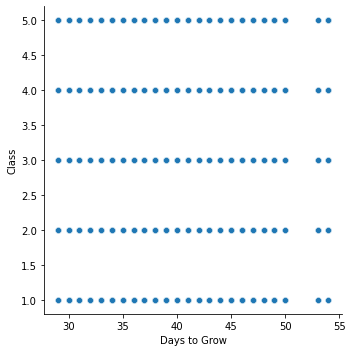

In [72]:
sns.relplot('Days to Grow','Class',data=y_train)

Dropping the original date columns

In [42]:
initial_df.drop(columns=['Flight Date.','Plant Date','Check Date'],inplace=True)

In [43]:
# Splitting features from the data for training
X_train = initial_df.reset_index(drop=True)

In [44]:
X_train

,Batch Number,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Remove,Plant_day,Plant_month,Plant_year,Flight_day,Flight_month,Flight_year,Check_day,Check_month,Check_year
0,402,213.0,55.0,55.0,17.07,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
1,402,179.0,40.0,40.0,17.07,643.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
2,402,183.0,50.0,50.0,17.07,647.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
3,402,176.0,40.0,40.0,17.07,694.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
4,402,192.0,70.0,70.0,17.07,730.0,570,NaN,11,4,2020,30,4,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,693,81.0,36.0,40.0,17.07,247.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3191,693,103.0,40.0,50.0,17.07,211.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3192,693,132.0,40.0,40.0,17.07,337.0,290,NaN,8,8,2020,10,9,2020,17,9,2020
3193,693,183.0,50.0,45.0,17.07,370.0,290,NaN,8,8,2020,10,9,2020,17,9,2020


Applying standard scalar on X_train data

In [45]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [46]:
X_train

array([[-2.34914722, -1.14607304, -1.34614594, ...,  0.94960168,
        -3.11424346,  0.        ],
       [-2.34914722, -1.25904779, -1.71187389, ...,  0.94960168,
        -3.11424346,  0.        ],
       [-2.34914722, -1.24575665, -1.46805526, ...,  0.94960168,
        -3.11424346,  0.        ],
       ...,
       [ 1.39236521, -1.41521878, -1.71187389, ...,  0.37836027,
         1.4156941 ,  0.        ],
       [ 1.39236521, -1.24575665, -1.46805526, ...,  0.37836027,
         1.4156941 ,  0.        ],
       [ 1.39236521, -1.52819354, -1.95569252, ...,  0.37836027,
         1.4156941 ,  0.        ]])

Visualising the data

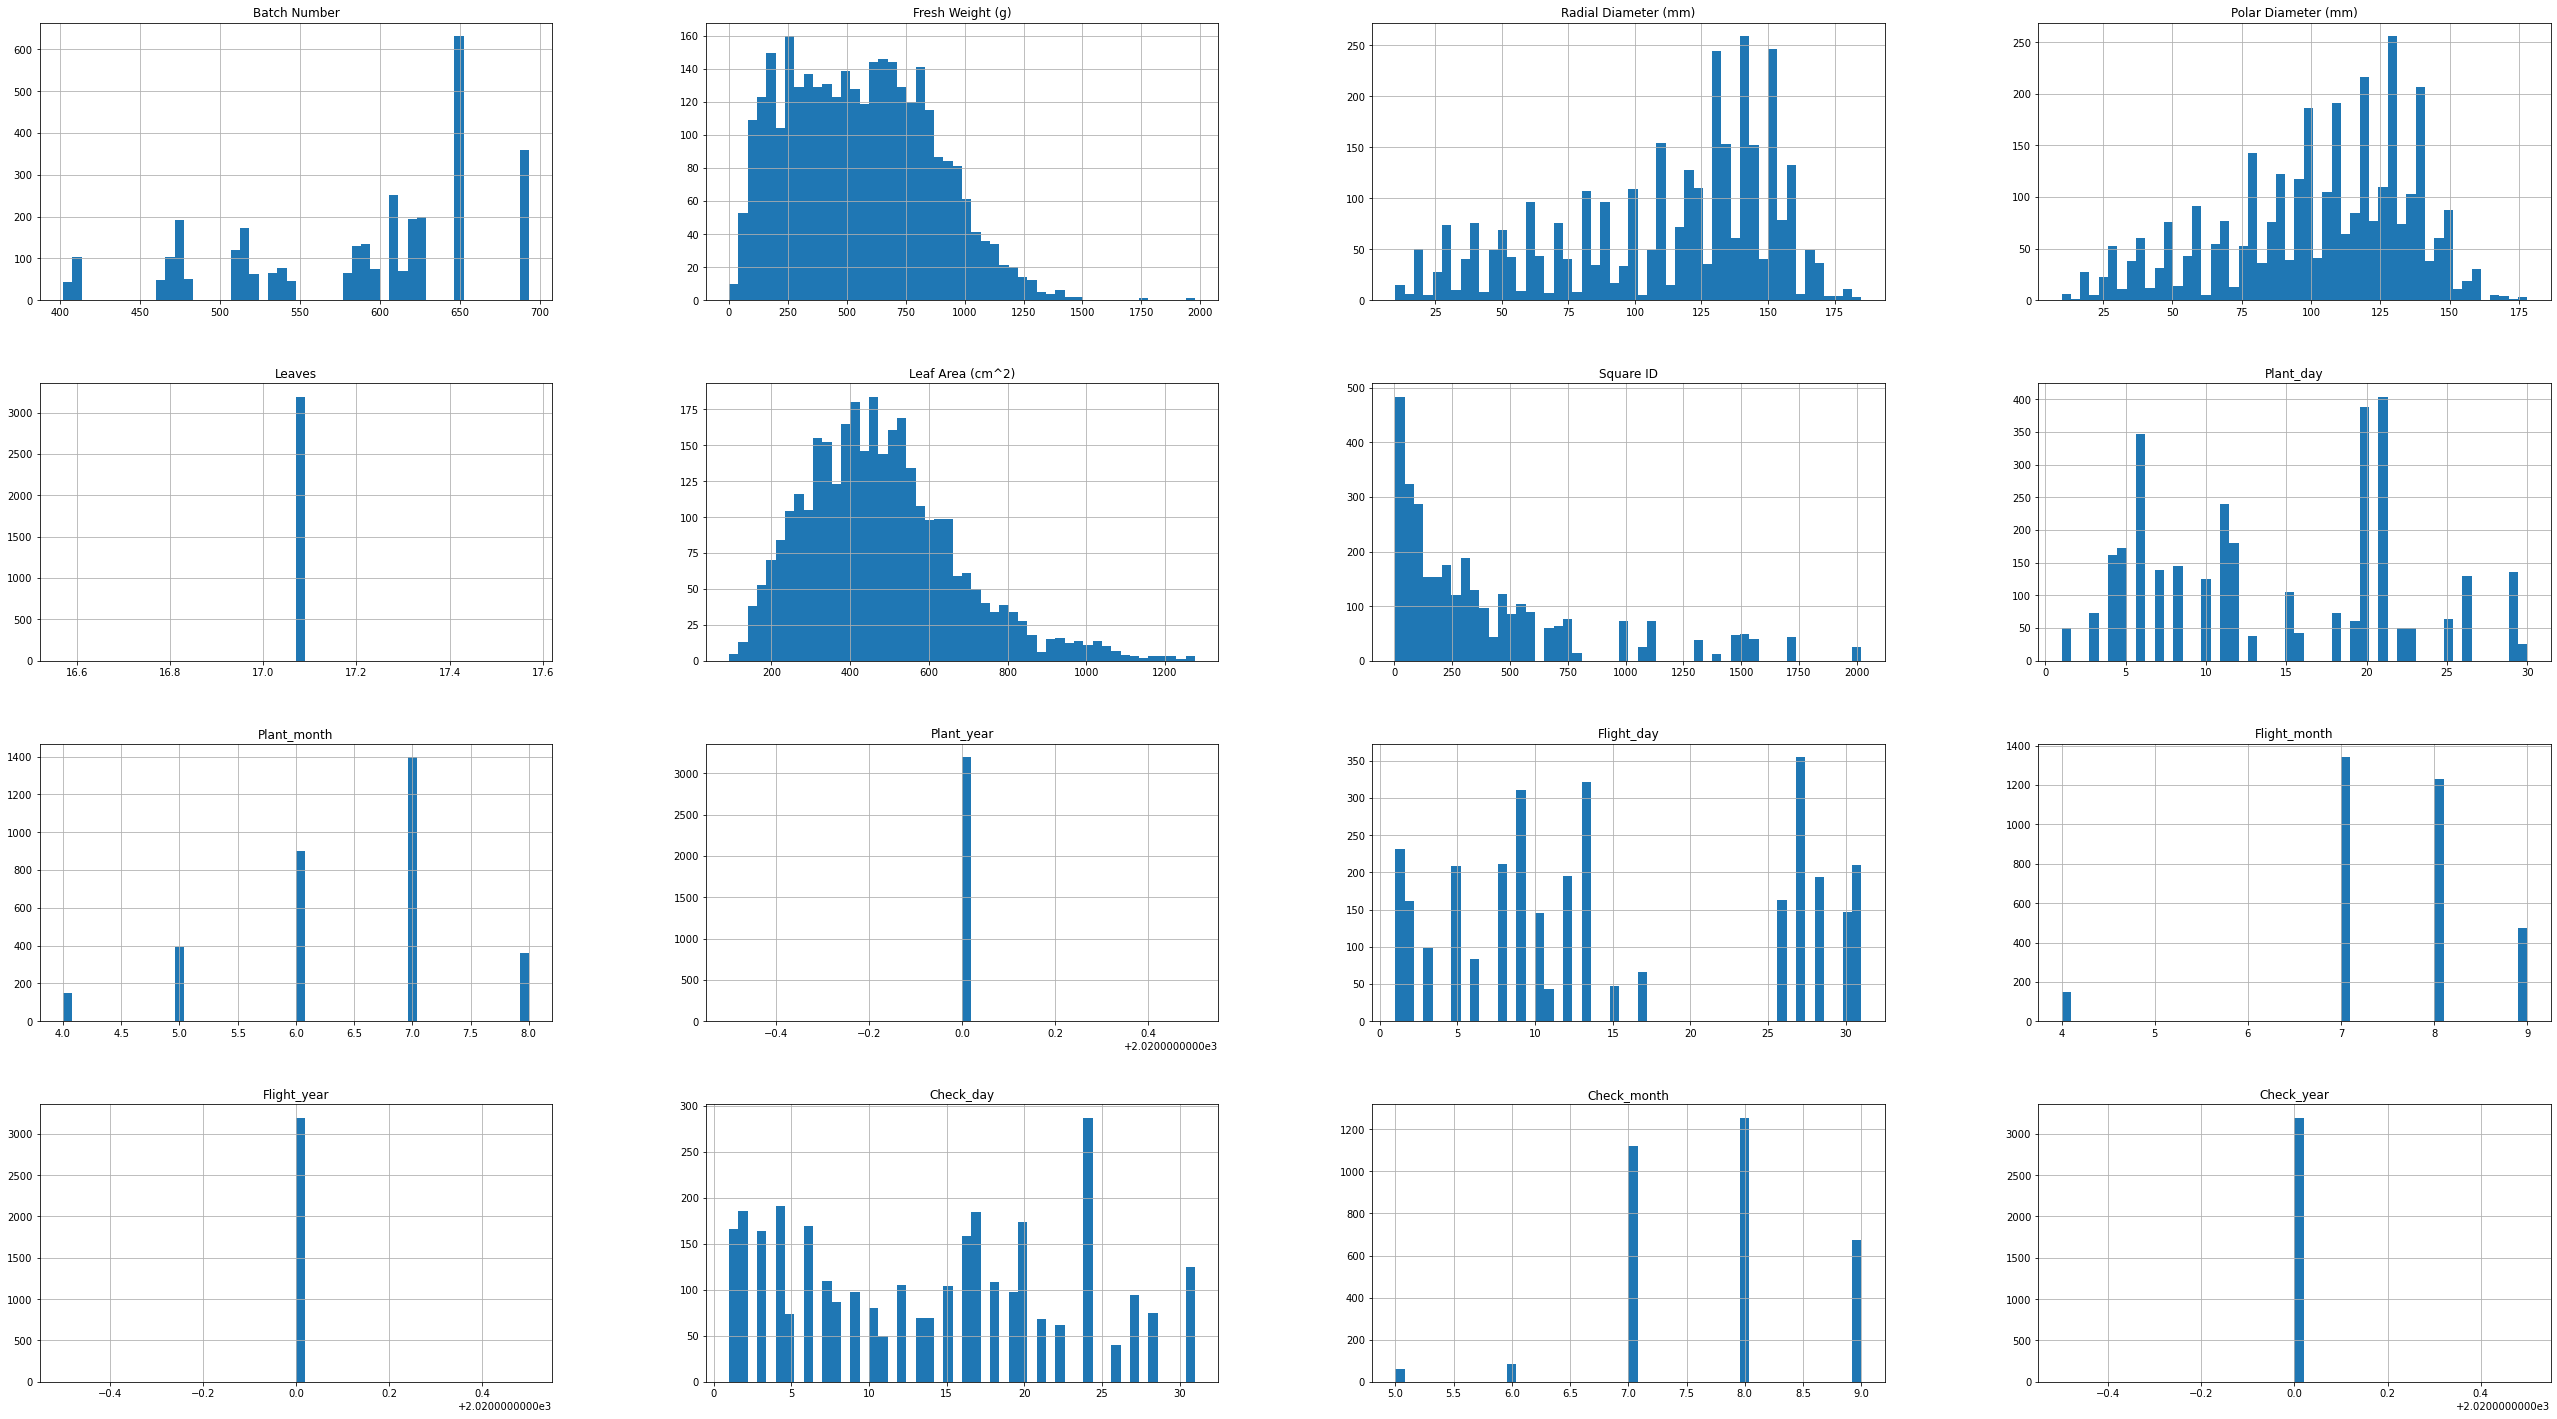

In [86]:
#Plotting 
# initial_df_replot.plot(x="Batch Number[402]", y=["Radial Diameter (mm)", "Leaves", "Leaf Area (cm^2)"], kind="bar")
# df_lists = initial_df_replot['Batch Number']
# initial_df_replot.apply(lambda x: pd.Series(x)).plot(y=["Radial Diameter (mm)", "Leaves", "Leaf Area (cm^2)"],kind='bar', width=0.9,figsize=(8,4))
# df_lists = initial_df_replot[['Batch Number']].unstack().apply(pd.Series)
# df_lists.plot.bar(rot=0, cmap=plt.cm.jet, fontsize=8, width=0.7, figsize=(8,4))
# my_list = initial_df_replot[['Batch Number']].unstack().apply(pd.Series)
# initial_df.apply(lambda x: pd.Series(x)).plot(y=["Radial Diameter (mm)", "Leaves", "Leaf Area (cm^2)"],kind='bar', width=0.9,figsize=(8,4))
# dff = pd.DataFrame({'list1': df_for_plotting['Batch Number']})
# df_lists = dff[['list1']].unstack().apply(pd.Series)
# df_for_plotting['Batch Number'].apply(lambda x: pd.Series(x)).plot(y=["Radial Diameter (mm)", "Leaves", "Leaf Area (cm^2)"],kind='bar', width=0.9,figsize=(8,4))
_ = df_for_plotting.hist(bins=50, figsize=(45,25))

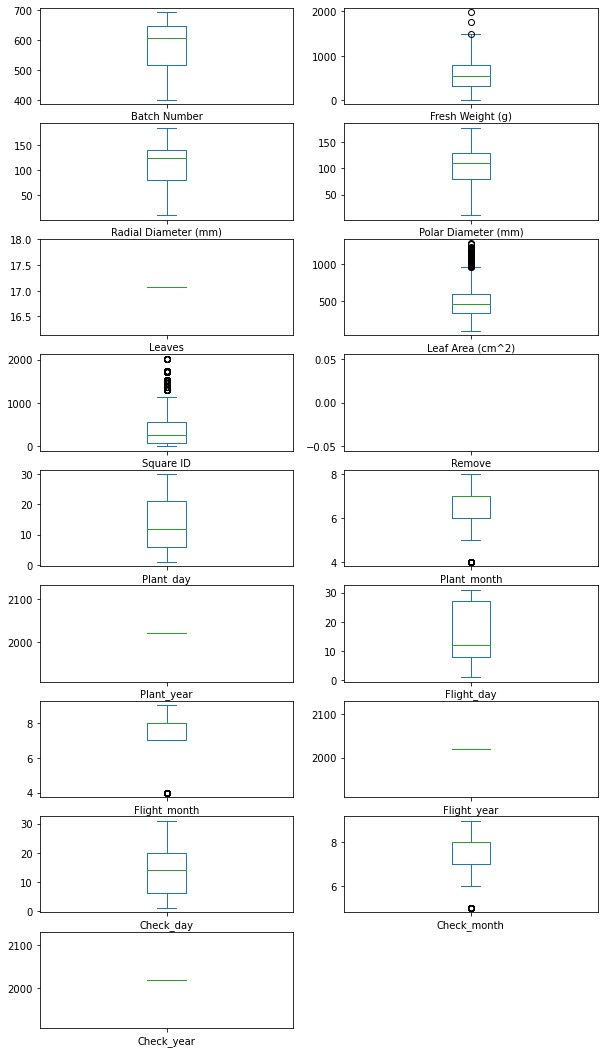

In [90]:
df_for_plotting.plot(kind='box', subplots=True,figsize=(10, 40),layout=(19,2),  sharex=False, sharey=False)
plt.show()

In [91]:
pd.set_option('display.width', 100)
pd.set_option('precision', 2)
correlations = df_for_plotting.corr(method='pearson')
print(correlations)

                      Batch Number  Fresh Weight (g)  Radial Diameter (mm)  Polar Diameter (mm)  \
Batch Number                  1.00             -0.26             -8.93e-02            -4.31e-02   
Fresh Weight (g)             -0.26              1.00              8.55e-01             8.09e-01   
Radial Diameter (mm)         -0.09              0.86              1.00e+00             9.34e-01   
Polar Diameter (mm)          -0.04              0.81              9.34e-01             1.00e+00   
Leaves                         NaN               NaN                   NaN                  NaN   
Leaf Area (cm^2)              0.16              0.19              1.05e-01             5.57e-02   
Square ID                    -0.38              0.03             -1.87e-02            -1.02e-02   
Plant_day                    -0.07              0.05              1.58e-01             1.09e-01   
Plant_month                   0.96             -0.24             -1.14e-01            -5.50e-02   
Plant_year